In [1]:
import yt
import netCDF4 as nc
import pyart
import matplotlib.pyplot as plt
import pygrib
import pandas as pd
import xarray as xr
import cfgrib
import ipywidgets


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
sandy_610 = pygrib.open('data/HurricaneSandy/Sandy/10292012/APSU_201210291810.grb')

In [3]:
grb = sandy_610[1]
grb

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


1:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:from 201210260000

In [4]:
data, lat, lon = grb.data()

In [5]:
data

array([[102409.424, 102406.864, 102403.28 , ..., 101512.4  , 101514.96 ,
        101517.52 ],
       [102403.792, 102400.976, 102396.88 , ..., 101492.688, 101494.992,
        101497.296],
       [102397.904, 102395.088, 102390.736, ..., 101472.72 , 101475.024,
        101477.072],
       ...,
       [101131.216, 101126.864, 101122.512, ..., 100774.864, 100779.472,
        100784.08 ],
       [101133.264, 101129.168, 101125.072, ..., 100778.704, 100783.568,
        100788.432],
       [101134.544, 101130.704, 101126.864, ..., 100780.496, 100785.104,
        100789.712]])

In [6]:
lat

array([[45.  , 45.  , 45.  , ..., 45.  , 45.  , 45.  ],
       [44.95, 44.95, 44.95, ..., 44.95, 44.95, 44.95],
       [44.9 , 44.9 , 44.9 , ..., 44.9 , 44.9 , 44.9 ],
       ...,
       [20.1 , 20.1 , 20.1 , ..., 20.1 , 20.1 , 20.1 ],
       [20.05, 20.05, 20.05, ..., 20.05, 20.05, 20.05],
       [20.  , 20.  , 20.  , ..., 20.  , 20.  , 20.  ]])

In [7]:
grb.keys()

['globalDomain',
 'GRIBEditionNumber',
 'eps',
 'offsetSection0',
 'section0Length',
 'totalLength',
 'editionNumber',
 'WMO',
 'productionStatusOfProcessedData',
 'section1Length',
 'wrongPadding',
 'table2Version',
 'centre',
 'centreDescription',
 'generatingProcessIdentifier',
 'gridDefinition',
 'indicatorOfParameter',
 'parameterName',
 'parameterUnits',
 'indicatorOfTypeOfLevel',
 'pressureUnits',
 'typeOfLevelECMF',
 'typeOfLevel',
 'level',
 'yearOfCentury',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'unitOfTimeRange',
 'P1',
 'P2',
 'timeRangeIndicator',
 'numberIncludedInAverage',
 'numberMissingFromAveragesOrAccumulations',
 'centuryOfReferenceTimeOfData',
 'subCentre',
 'paramIdECMF',
 'paramId',
 'cfNameECMF',
 'cfName',
 'cfVarNameECMF',
 'cfVarName',
 'unitsECMF',
 'units',
 'nameECMF',
 'name',
 'decimalScaleFactor',
 'setLocalDefinition',
 'optimizeScaleFactor',
 'dataDate',
 'year',
 'dataTime',
 'julianDay',
 'stepUnits',
 'stepType',
 'stepRange',
 'startSte

In [9]:
sandy_610.seek(0)
grib_cols = ['messagenumber', 'name', 'units','gridType','typeOfLevel','level']
s610_df = pd.DataFrame([[getattr(grib,key) for key in grib_cols] for grib in sandy_610], columns = grib_cols)
s610_df.set_index('messagenumber')

,name,units,gridType,typeOfLevel,level
messagenumber,,,,,
1,Mean sea level pressure,Pa,regular_ll,meanSea,0
2,Vertical velocity,Pa s**-1,regular_ll,isobaricInhPa,200
3,U component of wind,m s**-1,regular_ll,isobaricInhPa,200
4,V component of wind,m s**-1,regular_ll,isobaricInhPa,200
5,Vertical velocity,Pa s**-1,regular_ll,isobaricInhPa,300
6,U component of wind,m s**-1,regular_ll,isobaricInhPa,300
7,V component of wind,m s**-1,regular_ll,isobaricInhPa,300
8,Vertical velocity,Pa s**-1,regular_ll,isobaricInhPa,500
9,U component of wind,m s**-1,regular_ll,isobaricInhPa,500


In [10]:
i = 1
while i < len(s610_df):
    print(sandy_610[i].data()[0])
    i+=1

[[102409.424 102406.864 102403.28  ... 101512.4   101514.96  101517.52 ]
 [102403.792 102400.976 102396.88  ... 101492.688 101494.992 101497.296]
 [102397.904 102395.088 102390.736 ... 101472.72  101475.024 101477.072]
 ...
 [101131.216 101126.864 101122.512 ... 100774.864 100779.472 100784.08 ]
 [101133.264 101129.168 101125.072 ... 100778.704 100783.568 100788.432]
 [101134.544 101130.704 101126.864 ... 100780.496 100785.104 100789.712]]
[[ 0.0311  0.0375  0.0439 ... -0.0097 -0.0065 -0.0033]
 [ 0.0207  0.0263  0.0319 ... -0.0097 -0.0073 -0.0049]
 [ 0.0095  0.0143  0.0199 ... -0.0105 -0.0089 -0.0065]
 ...
 [ 0.0375  0.0391  0.0455 ... -0.0825 -0.0577 -0.0329]
 [ 0.0215  0.0287  0.0399 ... -0.0609 -0.0353 -0.0097]
 [ 0.0031  0.0175  0.0351 ... -0.0321 -0.0113  0.0087]]
[[-8.7454 -9.0222 -9.299  ... -7.4542 -7.4846 -7.515 ]
 [-8.811  -9.0894 -9.3678 ... -7.1614 -7.195  -7.2302]
 [-8.8766 -9.155  -9.4366 ... -6.8686 -6.907  -6.9454]
 ...
 [22.133  22.109  22.0818 ...  5.1538  5.1826  5.2

[[ -9.5607  -9.6055  -9.6407 ...  -5.2407  -5.2295  -5.2199]
 [ -9.6503  -9.6951  -9.7367 ...  -5.3191  -5.3175  -5.3175]
 [ -9.7383  -9.7847  -9.8311 ...  -5.3975  -5.4055  -5.4151]
 ...
 [-10.3111 -10.2935 -10.2775 ...   2.9129   2.9033   2.8905]
 [-10.3495 -10.3159 -10.2839 ...   2.8953   2.8857   2.8761]
 [-10.3751 -10.3223 -10.2759 ...   2.8953   2.8809   2.8649]]
[[ -0.4298  -0.3418  -0.2442 ... -14.3146 -14.3482 -14.3818]
 [ -0.3002  -0.2106  -0.1146 ... -14.3818 -14.4186 -14.457 ]
 [ -0.1706  -0.0794   0.015  ... -14.4506 -14.4906 -14.5322]
 ...
 [  1.1366   1.2662   1.3702 ...   6.8454   6.8678   6.8902]
 [  1.1606   1.279    1.3766 ...   6.7606   6.7766   6.7926]
 [  1.183    1.2854   1.3718 ...   6.655    6.6614   6.6662]]
[[-8.217  -8.2538 -8.2858 ... -4.6474 -4.6378 -4.6282]
 [-8.2906 -8.3306 -8.3658 ... -4.7258 -4.7226 -4.721 ]
 [-8.3658 -8.4058 -8.4442 ... -4.8026 -4.809  -4.8154]
 ...
 [-9.5018 -9.4826 -9.4666 ...  2.6038  2.599   2.5958]
 [-9.5354 -9.5018 -9.4714 ...  

In [11]:
s610_df.iloc[:]

,messagenumber,name,units,gridType,typeOfLevel,level
0,1,Mean sea level pressure,Pa,regular_ll,meanSea,0
1,2,Vertical velocity,Pa s**-1,regular_ll,isobaricInhPa,200
2,3,U component of wind,m s**-1,regular_ll,isobaricInhPa,200
3,4,V component of wind,m s**-1,regular_ll,isobaricInhPa,200
4,5,Vertical velocity,Pa s**-1,regular_ll,isobaricInhPa,300
5,6,U component of wind,m s**-1,regular_ll,isobaricInhPa,300
6,7,V component of wind,m s**-1,regular_ll,isobaricInhPa,300
7,8,Vertical velocity,Pa s**-1,regular_ll,isobaricInhPa,500
8,9,U component of wind,m s**-1,regular_ll,isobaricInhPa,500
9,10,V component of wind,m s**-1,regular_ll,isobaricInhPa,500


In [12]:
s610_df.groupby('name')

In [13]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210291810.grb','name')
s610_uWind=grbindx(name='U component of wind')
s610_uWind

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


[1:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200:from 201210260000,
 2:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 300:from 201210260000,
 3:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 500:from 201210260000,
 4:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 700:from 201210260000,
 5:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 750:from 201210260000,
 6:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 850:from 201210260000,
 7:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000:from 201210260000,
 8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1013:from 201210260000]

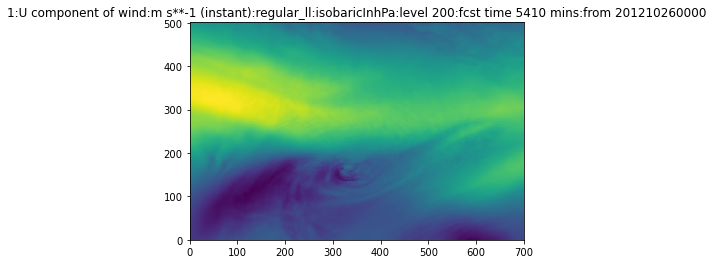

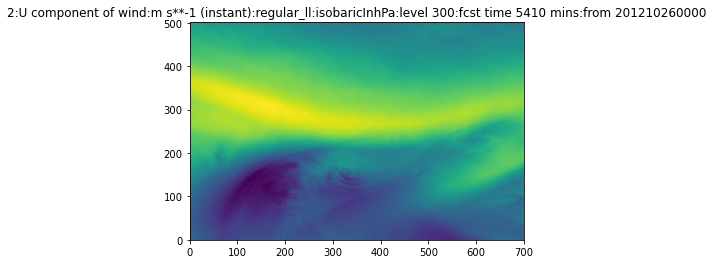

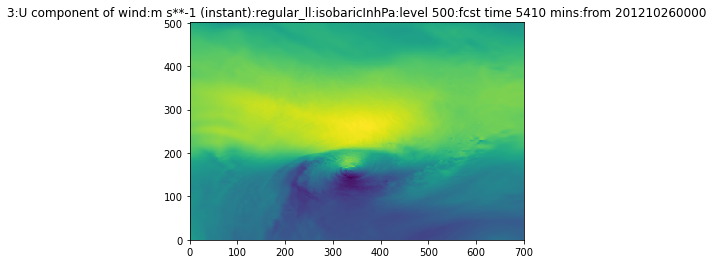

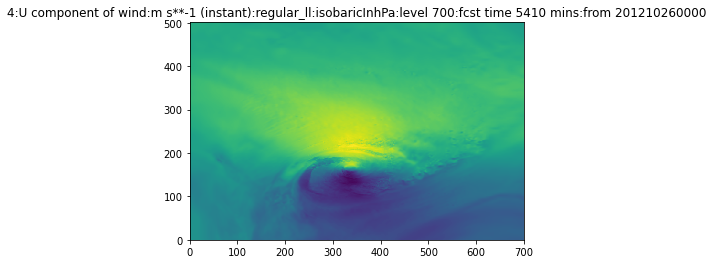

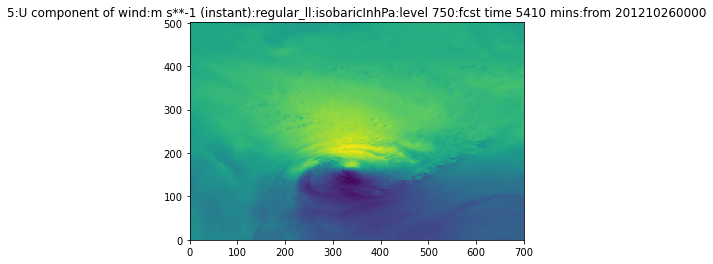

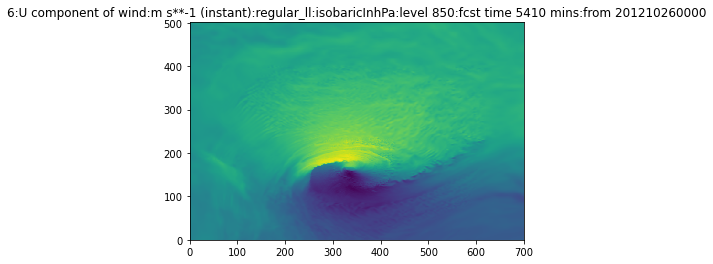

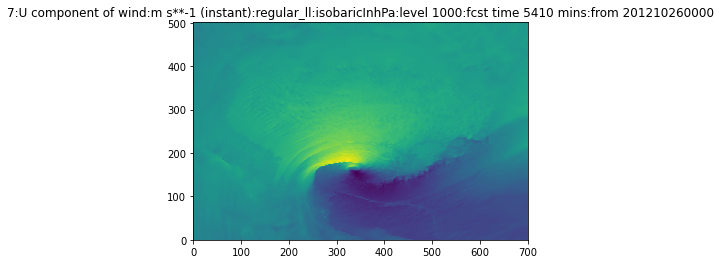

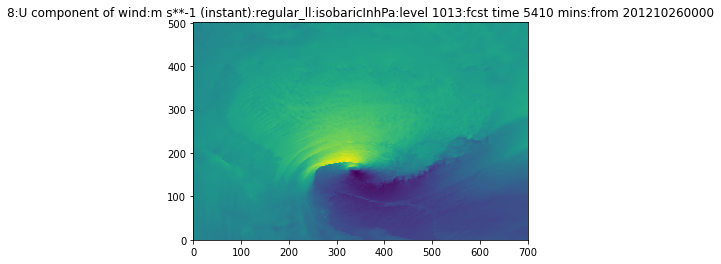

In [14]:
count = 0
for i in s610_uWind:
    plt.figure()
    grb = s610_uWind[count]
    plt.pcolormesh(grb.data()[0])
    plt.title(s610_uWind[count])
    plt.ylabel=(s610_uWind[count].units)
    count += 1
plt.show()

In [2]:
@ipywidgets.interact(count = (0,7))
def make_plot(count):
    for i in s610_uWind:
        plt.clf()
        grb = s610_uWind[count]
        plt.pcolormesh(grb.data()[0])
        plt.title(s610_uWind[count])
        plt.ylabel=(s610_uWind[count].units)

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py:14: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  DeprecationWarning


interactive(children=(IntSlider(value=3, description='count', max=7), Output()), _dom_classes=('widget-interac…

In [16]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210291810.grb','name')
s610_vWind=grbindx(name='V component of wind')
s610_vWind

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


[1:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200:from 201210260000,
 2:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 300:from 201210260000,
 3:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 500:from 201210260000,
 4:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 700:from 201210260000,
 5:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 750:from 201210260000,
 6:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 850:from 201210260000,
 7:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000:from 201210260000,
 8:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1013:from 201210260000]

In [17]:
@ipywidgets.interact(count = (0,7))
def make_plot(count):
    for i in s610_vWind:
        plt.clf()
        grb = s610_vWind[count]
        plt.pcolormesh(grb.data()[0])
        plt.title(s610_vWind[count])
        plt.ylabel=(s610_vWind[count].units)

interactive(children=(IntSlider(value=3, description='count', max=7), Output()), _dom_classes=('widget-interac…

In [18]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210291810.grb','name')
s610_vVel=grbindx(name='Vertical velocity')
s610_vVel

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


[1:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 200:from 201210260000,
 2:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 300:from 201210260000,
 3:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 500:from 201210260000,
 4:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 700:from 201210260000,
 5:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 750:from 201210260000,
 6:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 850:from 201210260000,
 7:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 1000:from 201210260000,
 8:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 1013:from 201210260000]

In [19]:
@ipywidgets.interact(count = (0,7))
def make_plot(count):
    for i in s610_vVel:
        plt.clf()
        grb = s610_vVel[count]
        plt.pcolormesh(grb.data()[0])
        plt.title(s610_vVel[count])
        plt.ylabel=(s610_vVel[count].units)

interactive(children=(IntSlider(value=3, description='count', max=7), Output()), _dom_classes=('widget-interac…

In [20]:
sandy_620 = pygrib.open('data/HurricaneSandy/Sandy/10292012/APSU_201210291820.grb')

In [21]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210291820.grb','name')
s620_uWind=grbindx(name='U component of wind')
s620_uWind

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


[1:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200:from 201210260000,
 2:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 300:from 201210260000,
 3:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 500:from 201210260000,
 4:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 700:from 201210260000,
 5:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 750:from 201210260000,
 6:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 850:from 201210260000,
 7:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000:from 201210260000,
 8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1013:from 201210260000]

In [22]:
@ipywidgets.interact(count = (0,7))
def make_plot(count):
    for i in s620_uWind:
        plt.clf()
        grb = s620_uWind[count]
        plt.pcolormesh(grb.data()[0])
        plt.title(s620_uWind[count])
        plt.ylabel=(s620_uWind[count].units)

interactive(children=(IntSlider(value=3, description='count', max=7), Output()), _dom_classes=('widget-interac…

In [23]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210291820.grb','name')
s620_vWind=grbindx(name='V component of wind')
s620_vWind

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


[1:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200:from 201210260000,
 2:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 300:from 201210260000,
 3:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 500:from 201210260000,
 4:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 700:from 201210260000,
 5:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 750:from 201210260000,
 6:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 850:from 201210260000,
 7:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000:from 201210260000,
 8:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1013:from 201210260000]

In [24]:
@ipywidgets.interact(count = (0,7))
def make_plot(count):
    for i in s620_vWind:
        plt.clf()
        grb = s620_vWind[count]
        plt.pcolormesh(grb.data()[0])
        plt.title(s620_vWind[count])
        plt.ylabel=(s620_vWind[count].units)

interactive(children=(IntSlider(value=3, description='count', max=7), Output()), _dom_classes=('widget-interac…

In [25]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210291820.grb','name')
s620_vVel=grbindx(name='Vertical velocity')
s620_vVel

ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units
ECCODES ERROR   :  unable to represent the step in h
                    Hint: try changing the step units


[1:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 200:from 201210260000,
 2:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 300:from 201210260000,
 3:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 500:from 201210260000,
 4:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 700:from 201210260000,
 5:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 750:from 201210260000,
 6:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 850:from 201210260000,
 7:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 1000:from 201210260000,
 8:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 1013:from 201210260000]

In [26]:
@ipywidgets.interact(count = (0,7))
def make_plot(count):
    for i in s620_vVel:
        plt.clf()
        grb = s620_vVel[count]
        plt.pcolormesh(grb.data()[0])
        plt.title(s620_vVel[count])
        plt.ylabel=(s620_vVel[count].units)

interactive(children=(IntSlider(value=3, description='count', max=7), Output()), _dom_classes=('widget-interac…

In [5]:
sandy_1140 = pygrib.open('data/HurricaneSandy/Sandy/10292012/APSU_201210292340.grb')

grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210292220.grb','name')
uWind=grbindx(name='U component of wind')

grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210292220.grb','name')
vWind=grbindx(name='V component of wind')

grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210292220.grb','name')
vVel=grbindx(name='Vertical velocity')


In [9]:
x = 'uWind'
vars()[x] = uWind
y = 'vWind'
vars()[y] = vWind
z = 'vVel'
vars()[z] = vVel

name = ipywidgets.Dropdown(options=[uWind,vWind,vVel],
    description='Name:')
name

Dropdown(description='Name:', options=([1:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level…

In [10]:
level = ipywidgets.SelectionSlider(options = [uWind[0].level,uWind[1].level,uWind[2].level,uWind[3].level,uWind[4].level,uWind[5].level,uWind[6].level,uWind[7].level],
                                  description = 'Level:')

In [11]:
@ipywidgets.interact(count = level,var = name)
def make_plot(var,count):
    plot_type = name.value
    for i in plot_type:
        plt.clf()
        grb = plot_type[level.index]
        plt.pcolormesh(grb.data()[0])
        plt.title(var[level.index])

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py:14: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  DeprecationWarning


interactive(children=(Dropdown(description='Name:', options=([1:U component of wind:m s**-1 (instant):regular_…

In [2]:
import os
# assign directory
directory = 'data/HurricaneSandy/Sandy/10292012/'
sandy_1029 = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename != '.DS_Store':
        sandy_1029.append(f)
        
directory = 'data/HurricaneSandy/Sandy/10302012/'
sandy_1030 = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename != '.DS_Store':
        sandy_1030.append(f)

In [3]:
sandy_1029.sort()
sandy_1029

['data/HurricaneSandy/Sandy/10292012/APSU_201210290000.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290010.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290020.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290030.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290040.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290050.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290100.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290110.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290120.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290130.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290140.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290150.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290200.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290210.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290220.grb',
 'data/HurricaneSandy/Sandy/10292012/APSU_201210290230.grb',
 'data/HurricaneSandy/Sa

In [4]:
sandy_1030.sort()
sandy_1030

['data/HurricaneSandy/Sandy/10302012/APSU_201210300000.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300010.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300020.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300030.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300040.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300050.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300100.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300110.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300120.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300130.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300140.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300150.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300200.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300210.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300220.grb',
 'data/HurricaneSandy/Sandy/10302012/APSU_201210300230.grb',
 'data/HurricaneSandy/Sa

In [5]:
all_sandyFiles = [sandy_1029,sandy_1030]

In [6]:
dateSandy = ipywidgets.Dropdown(options = ['10/29/2012','10/30/2012'])

In [7]:
dateSandy


Dropdown(options=('10/29/2012', '10/30/2012'), value='10/29/2012')

In [8]:
def timeSandy(dateSandy):
    if dateSandy.value == '10/29/2012':
        timeSandy = ipywidgets.Dropdown(options = sandy_1029)
        return(timeSandy)
    if dateSandy.value == '10/30/2012':
        timeSandy = ipywidgets.Dropdown(options = sandy_1030)
        return(timeSandy)

In [9]:
timeSandy(dateSandy)

Dropdown(options=('data/HurricaneSandy/Sandy/10292012/APSU_201210290000.grb', 'data/HurricaneSandy/Sandy/10292…

In [10]:
grbindx=pygrib.index(timeSandy(dateSandy).value,'name')
uWind=grbindx(name='U component of wind')

grbindx=pygrib.index(timeSandy(dateSandy).value,'name')
vWind=grbindx(name='V component of wind')

grbindx=pygrib.index(timeSandy(dateSandy).value,'name')
vVel=grbindx(name='Vertical velocity')
x = 'uWind'
vars()[x] = uWind
y = 'vWind'
vars()[y] = vWind
z = 'vVel'
vars()[z] = vVel

name = ipywidgets.Dropdown(options=[uWind,vWind,vVel],
    description='Name:')
name

Dropdown(description='Name:', options=([1:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level…

In [11]:
level = ipywidgets.SelectionSlider(options = [uWind[0].level,uWind[1].level,uWind[2].level,uWind[3].level,uWind[4].level,uWind[5].level,uWind[6].level,uWind[7].level],
                                  description = 'Level:')

In [12]:
name

Dropdown(description='Name:', options=([1:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level…

In [13]:
date_time = {}
for d in dateSandy.options:
    if date_time == {}:
        date_time = {d:all_sandyFiles[0]}
    else:
        date_time[dateSandy.options[1]]=all_sandyFiles[1]

In [14]:
type(date_time['10/29/2012'][0])

str

In [15]:
date = ipywidgets.Dropdown(options = ['10/29/2012','10/30/2012'],
                          description = 'Pick a Date')
date

Dropdown(description='Pick a Date', options=('10/29/2012', '10/30/2012'), value='10/29/2012')

In [16]:
time = ipywidgets.Dropdown(options = date_time[date.value],
                           description = 'Pick a Time')
time

Dropdown(description='Pick a Time', options=('data/HurricaneSandy/Sandy/10292012/APSU_201210290000.grb', 'data…

In [17]:
date_time

{'10/29/2012': ['data/HurricaneSandy/Sandy/10292012/APSU_201210290000.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290010.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290020.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290030.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290040.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290050.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290100.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290110.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290120.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290130.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290140.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290150.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290200.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290210.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290220.grb',
  'data/HurricaneSandy/Sandy/10292012/APSU_201210290230.

In [18]:
grb = pygrib.open('data/HurricaneSandy/Sandy/10302012/APSU_201210300030.grb',)
grb.select(level = 200,name = 'Vertical velocity')[0].data

<function gribmessage.data>

In [19]:
time_dict = {}
x = 0
for c in range(0,24,1):
    for i in range(0,60,10):
        t = (c * 100) + i
        time = ('%0*d' % (4, t))
        time_dict[x]= time
        x += 1
time_dict

{0: '0000',
 1: '0010',
 2: '0020',
 3: '0030',
 4: '0040',
 5: '0050',
 6: '0100',
 7: '0110',
 8: '0120',
 9: '0130',
 10: '0140',
 11: '0150',
 12: '0200',
 13: '0210',
 14: '0220',
 15: '0230',
 16: '0240',
 17: '0250',
 18: '0300',
 19: '0310',
 20: '0320',
 21: '0330',
 22: '0340',
 23: '0350',
 24: '0400',
 25: '0410',
 26: '0420',
 27: '0430',
 28: '0440',
 29: '0450',
 30: '0500',
 31: '0510',
 32: '0520',
 33: '0530',
 34: '0540',
 35: '0550',
 36: '0600',
 37: '0610',
 38: '0620',
 39: '0630',
 40: '0640',
 41: '0650',
 42: '0700',
 43: '0710',
 44: '0720',
 45: '0730',
 46: '0740',
 47: '0750',
 48: '0800',
 49: '0810',
 50: '0820',
 51: '0830',
 52: '0840',
 53: '0850',
 54: '0900',
 55: '0910',
 56: '0920',
 57: '0930',
 58: '0940',
 59: '0950',
 60: '1000',
 61: '1010',
 62: '1020',
 63: '1030',
 64: '1040',
 65: '1050',
 66: '1100',
 67: '1110',
 68: '1120',
 69: '1130',
 70: '1140',
 71: '1150',
 72: '1200',
 73: '1210',
 74: '1220',
 75: '1230',
 76: '1240',
 77: '125

In [20]:
plt.rcParams['figure.dpi'] = 300
@ipywidgets.interact(date = date,time = (0,143,1),count = level,var = ['U component of wind','V component of wind','Vertical velocity'])
def make_plot(date,time,count,var):
    grb = pygrib.open(date_time[date][time])
    data,lat,lon = grb.select(level = count,name = var)[0].data()
    plt.clf()
    plt.pcolormesh(data)
    plt.title(f"{var} on {date} at {time_dict[time]}, level: {count}")

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py:14: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  DeprecationWarning


interactive(children=(Dropdown(description='Pick a Date', options=('10/29/2012', '10/30/2012'), value='10/29/2…

In [28]:
def yt_load(time):
    grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210292220.grb','forecastTime')
    uWind=grbindx(forecastTime = time)
    print(uWind)

In [30]:
yt_load(time = 0)

ValueError: no matches found

In [35]:
grbindx=pygrib.index('data/HurricaneSandy/Sandy/10292012/APSU_201210292220.grb','forecastTime')
print(grbindx.keys)
uWind=grbindx(forecastTime = 0)

['forecastTime']


ValueError: no matches found